In [67]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
from sensor_projection_utils import *
from datetime import  datetime
import os
import matplotlib.pyplot as plt

In [68]:
def video_frames_value_matrix(video_number, frames_range, data_type='X'):
    column_names = [f"U{i}.{data_type}" for i in range(1, 49)]

    # Create an empty DataFrame with specified columns
    matrix = pd.DataFrame(columns=column_names)

    # Add the index column "Frame.No" with integer values
    matrix.index.name = 'Frame.No'

    # Determine the number of rows based on frames_range
    num_rows = frames_range[1] - frames_range[0] + 1

    # Iterate through user folders
    for user_number in range(1, 49):
        folder_path = f"./{user_number}/"  # Update this path
        
        # Check if folder exists
        if os.path.exists(folder_path):
            csv_path = os.path.join(folder_path, f"video_{video_number}-projection.csv")
            # Check if CSV file exists
            if os.path.exists(csv_path):
                # Read CSV file
                df = pd.read_csv(csv_path)
                df.drop_duplicates(subset=['Frame.No'], inplace=True)
                trunc_df = df.loc[(df['Frame.No'] >= frames_range[0]) & (df['Frame.No'] <= frames_range[1]), ['Frame.No', data_type]]
                matrix[f'U{user_number}.X'] = trunc_df.set_index('Frame.No')[data_type]

    ### Preprocessing 
    matrix = matrix.fillna(method='ffill')
    for col in matrix.columns:
        min_val = matrix[col].min()
        max_val = matrix[col].max()
        matrix[col] = (matrix[col] - min_val) / (max_val - min_val)
    
    # Reindexing and filling missing values
    matrix = matrix.reindex(range(1, num_rows + 1)).fillna(method='ffill')

    return matrix


In [69]:
mat1_onemin_x = video_frames_value_matrix(1,[1,1800],data_type='X')
mat1_onemin_x

# 
# # Flatten the DataFrame into a 1D array
# one_dimensional_vector = mat1_onemin_x.values.ravel()
# 
# # Calculate the mean of the 1D array
# mean_value = np.mean(one_dimensional_vector)
# len(one_dimensional_vector)
# l1_mean = one_dimensional_vector.mean()
# l1_std = one_dimensional_vector.std()
# one_dimensional_vector.shape

,U1.X,U2.X,U3.X,U4.X,U5.X,U6.X,U7.X,U8.X,U9.X,U10.X,...,U39.X,U40.X,U41.X,U42.X,U43.X,U44.X,U45.X,U46.X,U47.X,U48.X
Frame.No,,,,,,,,,,,,,,,,,,,,,
1,0.395420,0.754448,0.701508,0.707166,0.145750,0.752653,0.019219,0.210622,0.403119,0.118870,...,0.221970,0.841851,0.527109,0.595854,0.057363,0.523696,0.280961,0.980625,0.772862,0.997371
2,0.395404,0.754410,0.700790,0.704880,0.145750,0.752081,0.020153,0.210622,0.403085,0.118870,...,0.221970,0.841000,0.546947,0.595854,0.057363,0.522724,0.281425,0.998969,0.772656,0.997374
3,0.395404,0.754631,0.700593,0.703702,0.145750,0.751477,0.021377,0.210622,0.403073,0.118890,...,0.221951,0.842134,0.527770,0.595854,0.057092,0.523374,0.281349,0.980625,0.772428,0.997374
4,0.395398,0.754410,0.700583,0.677216,0.170693,0.751508,0.018740,0.210622,0.402390,0.118870,...,0.221951,0.842252,0.530140,0.596185,0.060691,0.523380,0.281369,0.980586,0.772441,0.997374
5,0.395393,0.754410,0.701028,0.702311,0.146095,0.751485,0.022326,0.210622,0.401638,0.119187,...,0.222211,0.842531,0.530526,0.595402,0.057455,0.523052,0.281369,0.980915,0.772454,0.997374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,0.046848,0.210083,0.278747,0.283748,0.035747,0.050593,0.277200,0.100118,0.041309,0.040586,...,0.032680,0.102775,0.120032,0.112378,0.087722,0.055716,0.192971,0.026561,0.035898,0.050859
1797,0.046848,0.208451,0.277175,0.283735,0.035747,0.050593,0.277200,0.097728,0.040284,0.041148,...,0.032259,0.100863,0.120032,0.112845,0.088569,0.055378,0.191343,0.027813,0.035677,0.050859
1798,0.046783,0.207575,0.276237,0.283487,0.036097,0.050076,0.274691,0.096663,0.040365,0.041148,...,0.031839,0.099164,0.120032,0.113268,0.090473,0.055378,0.190167,0.029109,0.035542,0.051171


In [70]:
def matrix_variations(df):
    # Initialize an empty DataFrame to store differences
    #df = df.drop(columns=['Mean','Std_Dev'])
    diff_df = pd.DataFrame(columns=df.columns)
    d_vec = {}
    for i in range (1,49):
        d_vec[f'U{i}.X'] = 0
    diff_df = diff_df.append(d_vec,ignore_index=True)
    
    
    # Iterate over rows
    for i in range(1, len(df)):
        #Logic for circular movement
        
        X1  = df.iloc[i-1]
        X2 = df.iloc[i]
        d_vec ={}
        for j in range(0,len(X1)):
            x1,x2 = X1[j] , X2[j]
            d=0
           
            if x1 < x2:
                if 1-x2 +x1 < np.abs(x2-x1):
                    d = (1 - x2 + x1)*-1 
                else:
                    d = x2-x1
            elif x1>x2:
                if 1-x1 +x2 < np.abs(x2-x1):
                    d = 1 - x1 + x2 
                else:
                    d = x2-x1
            
            
            d_vec[f'U{j+1}.X'] = d
        
        diff_df = diff_df.append(d_vec,ignore_index=True)
    
        

        
                
        
        
        
        # # Calculate differences between consecutive rows
        # row_diff = np.min((df.iloc[i] - df.iloc[i - 1]) , 1- df.iloc[i] + df.iloc[i-1])
        # row_diff = np.where(row_diff>1 , 2 - row_diff ,row_diff)
        # 
        # normal_values = np.where(normal_values > 1, 1 - normal_values, normal_values)
        # normal_values = np.where(normal_values < 0, 1 + normal_values, normal_values)
        # 
        # 
        #                   
        # # Store differences in the new DataFrame
        # diff_df.iloc[i - 1] = row_diff.values  # Include all columns
    
    diff_df['Mean'] = diff_df.mean(axis=1)
    diff_df['Std_Dev'] = diff_df.std(axis=1)
   # diff_df.drop_duplicates(subset=['Frame.No'], inplace=True)
    diff_df.index = range(1, len(diff_df) + 1)
    return diff_df


In [71]:
mat1_one_min_x_var = matrix_variations(mat1_onemin_x)
mat1_one_min_x_var

mat1_onemin_x['Mean'] = mat1_onemin_x.mean(axis=1)
mat1_onemin_x['Std_Dev'] = mat1_onemin_x.std(axis=1)


# 
# # Flatten the DataFrame into a 1D array
# one_dimensional_vector_diff = mat1_one_min_x_var.values.ravel()
# 
# l2_mean = one_dimensional_vector_diff.mean()
# l2_std = one_dimensional_vector_diff.std()
# one_dimensional_vector_diff.shape



In [72]:
#mat1_one_min_x_var
mat1_onemin_x

,U1.X,U2.X,U3.X,U4.X,U5.X,U6.X,U7.X,U8.X,U9.X,U10.X,...,U41.X,U42.X,U43.X,U44.X,U45.X,U46.X,U47.X,U48.X,Mean,Std_Dev
Frame.No,,,,,,,,,,,,,,,,,,,,,
1,0.395420,0.754448,0.701508,0.707166,0.145750,0.752653,0.019219,0.210622,0.403119,0.118870,...,0.527109,0.595854,0.057363,0.523696,0.280961,0.980625,0.772862,0.997371,0.536453,0.298285
2,0.395404,0.754410,0.700790,0.704880,0.145750,0.752081,0.020153,0.210622,0.403085,0.118870,...,0.546947,0.595854,0.057363,0.522724,0.281425,0.998969,0.772656,0.997374,0.537110,0.298287
3,0.395404,0.754631,0.700593,0.703702,0.145750,0.751477,0.021377,0.210622,0.403073,0.118890,...,0.527770,0.595854,0.057092,0.523374,0.281349,0.980625,0.772428,0.997374,0.536371,0.298073
4,0.395398,0.754410,0.700583,0.677216,0.170693,0.751508,0.018740,0.210622,0.402390,0.118870,...,0.530140,0.596185,0.060691,0.523380,0.281369,0.980586,0.772441,0.997374,0.536643,0.296917
5,0.395393,0.754410,0.701028,0.702311,0.146095,0.751485,0.022326,0.210622,0.401638,0.119187,...,0.530526,0.595402,0.057455,0.523052,0.281369,0.980915,0.772454,0.997374,0.536422,0.298005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,0.046848,0.210083,0.278747,0.283748,0.035747,0.050593,0.277200,0.100118,0.041309,0.040586,...,0.120032,0.112378,0.087722,0.055716,0.192971,0.026561,0.035898,0.050859,0.149389,0.175321
1797,0.046848,0.208451,0.277175,0.283735,0.035747,0.050593,0.277200,0.097728,0.040284,0.041148,...,0.120032,0.112845,0.088569,0.055378,0.191343,0.027813,0.035677,0.050859,0.149931,0.176748
1798,0.046783,0.207575,0.276237,0.283487,0.036097,0.050076,0.274691,0.096663,0.040365,0.041148,...,0.120032,0.113268,0.090473,0.055378,0.190167,0.029109,0.035542,0.051171,0.150116,0.177349


In [73]:
mat1_one_min_x_var

,U1.X,U2.X,U3.X,U4.X,U5.X,U6.X,U7.X,U8.X,U9.X,U10.X,...,U41.X,U42.X,U43.X,U44.X,U45.X,U46.X,U47.X,U48.X,Mean,Std_Dev
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
2,-0.000016,-0.000038,-0.000719,-0.002286,0.0,-0.000572,0.000934,0.0,-0.000034,0.0,...,0.019838,0.0,0.0,-0.000973,0.000465,0.018344,-0.000206,0.000002,0.000658,0.005131
3,0.0,0.000221,-0.000197,-0.001178,0.0,-0.000604,0.001224,0.0,-0.000012,0.00002,...,-0.019178,0.0,-0.000271,0.000651,-0.000076,-0.018344,-0.000228,0.0,-0.000739,0.005060
4,-0.000006,-0.000221,-0.00001,-0.026486,0.024944,0.000031,-0.002637,0.0,-0.000683,-0.00002,...,0.00237,0.000331,0.003599,0.000006,0.000019,-0.000039,0.000013,0.0,0.000271,0.005618
5,-0.000005,0.0,0.000445,0.025095,-0.024599,-0.000023,0.003586,0.0,-0.000752,0.000316,...,0.000386,-0.000782,-0.003236,-0.000328,0.0,0.000329,0.000013,0.0,-0.000220,0.005459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,-0.00004,-0.00083,-0.0009,0.0,0.000334,0.0,-0.0015,-0.001174,0.000034,0.000272,...,-0.000018,0.000096,0.001358,-0.000127,-0.002579,0.001215,-0.000042,0.0,0.000469,0.002287
1797,0.0,-0.001632,-0.001572,-0.000013,0.0,0.0,0.0,-0.00239,-0.001024,0.000562,...,0.0,0.000467,0.000847,-0.000338,-0.001628,0.001253,-0.00022,0.0,0.000542,0.002202
1798,-0.000066,-0.000876,-0.000938,-0.000248,0.00035,-0.000517,-0.002509,-0.001065,0.00008,0.0,...,0.0,0.000423,0.001904,0.0,-0.001176,0.001296,-0.000135,0.000312,0.000184,0.001485
1799,-0.000039,-0.001352,-0.00165,-0.000201,0.00035,0.0,-0.003199,0.0,0.000158,0.000455,...,0.000059,0.000321,0.001899,0.000216,0.0,0.002753,0.0,0.0,0.000396,0.002446


In [74]:
def draw_matrix(df, user_range, color_map=None):
    """
    Draw Ui.X columns from DataFrame df for the specified user range.

    Parameters:
    - df: DataFrame containing the columns to be drawn.
    - user_range: Range of user numbers to draw (e.g., (1, 10)).
    - color_map: Dictionary mapping user numbers to colors (optional).
    """
    plt.figure(figsize=(8, 2))
    user_columns = [f'U{user}.X' for user in range(user_range[0], user_range[1] + 1)]
    df_subset = df[user_columns]

    # Set up colors for the plots
    if color_map is None:
        color_map = {f'U{user}.X': plt.cm.tab10(i) for i, user in enumerate(range(user_range[0], user_range[1] + 1))}

    # Plot each column with specified color
    for column in df_subset.columns:
        plt.plot(df.index, df_subset[column], label=column, color=color_map[column])
        # Set figure size

     
    # Add labels and legend
    plt.xlabel('Frame.No')
    plt.ylabel('Value X')
   
    #plt.legend(title='User', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show the plot
    plt.show()

In [81]:
def generate_normal_values(df):
    new_df = pd.DataFrame(columns=[f'U{i}.X' for i in range(1, 26)])  # Create an empty DataFrame with appropriate column names
    
    for index, row in df.iterrows():
        mean = row['Mean']
        std_dev = row['Std_Dev']
        normal_values = np.random.normal(loc=mean, scale=std_dev, size=25)  # Generate 15 normally distributed values
        # Apply transformations
        normal_values = np.where(normal_values > 1, 1 - normal_values, normal_values)
        normal_values = np.where(normal_values < 0, 1 + normal_values, normal_values)
        
        new_df.loc[index] = normal_values  # Store the values in the new DataFrame
    
    # Add Mean and Std_Dev columns from the original DataFrame
    new_df['Original_Mean'] = df['Mean']
    new_df['Original_Std_Dev'] = df['Std_Dev']
    
    return new_df

In [82]:
gen_df = generate_normal_values(mat1_onemin_x)

In [83]:
gen_df

,U1.X,U2.X,U3.X,U4.X,U5.X,U6.X,U7.X,U8.X,U9.X,U10.X,...,U18.X,U19.X,U20.X,U21.X,U22.X,U23.X,U24.X,U25.X,Original_Mean,Original_Std_Dev
1,0.346722,0.367190,0.766302,0.612095,0.827300,0.323392,0.720321,0.606674,0.438592,0.308387,...,0.809592,0.922379,0.985114,0.823532,0.685696,0.037489,0.798823,0.835854,0.536453,0.298285
2,0.914505,0.443888,0.858499,0.325151,0.308095,0.435352,0.889337,0.060025,0.634858,0.196941,...,0.382240,0.889976,0.418625,0.396020,0.211608,0.703020,0.353255,0.502471,0.537110,0.298287
3,0.510258,0.775906,0.661489,0.824941,0.562874,0.417187,0.781890,0.352492,0.900132,0.797681,...,0.793107,0.126159,0.793752,0.461221,0.633800,0.730860,0.166152,0.508448,0.536371,0.298073
4,0.732895,0.966101,0.317972,0.660113,0.611699,0.745475,0.552676,0.442027,0.399150,0.354926,...,0.639198,0.430627,0.971529,0.828209,0.035130,0.916656,0.547088,0.466272,0.536643,0.296917
5,0.805188,0.628857,0.832766,0.920229,0.562832,0.517825,0.981555,0.073039,0.890868,0.085285,...,0.673274,0.096339,0.483110,0.226966,0.091723,0.677358,0.543054,0.242069,0.536422,0.298005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,0.012522,0.371322,0.300068,0.437377,0.011091,0.888635,0.225419,0.487391,0.977400,0.185867,...,0.182551,0.197656,0.235248,0.309495,0.363105,0.223436,0.306971,0.180726,0.149389,0.175321
1797,0.140218,0.880125,0.146782,0.070137,0.103130,0.399854,0.307815,0.040793,0.987392,0.032312,...,0.016600,0.465579,0.007031,0.928322,0.382702,0.197744,0.470785,0.301172,0.149931,0.176748
1798,0.226258,0.011050,0.177778,0.026779,0.047178,0.196884,0.453164,0.086607,0.242619,0.223292,...,0.033014,0.081493,0.146020,0.141890,0.128058,0.272752,0.001330,0.260125,0.150116,0.177349
1799,0.331098,0.984331,0.999820,0.257792,0.124794,0.027490,0.966013,0.359214,0.194818,0.178958,...,0.073578,0.029049,0.334963,0.993584,0.100920,0.200140,0.341649,0.061212,0.150512,0.178140


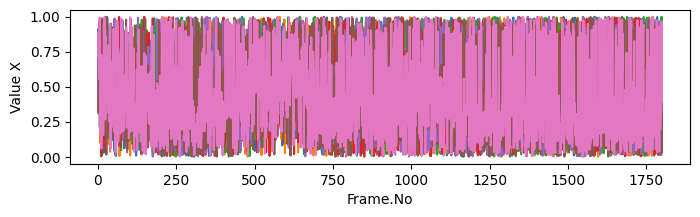

In [86]:
draw_matrix(gen_df,[1,7])

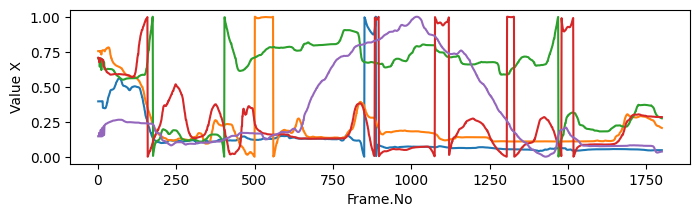

In [87]:
draw_matrix(mat1_onemin_x,[1,5])

In [144]:
def generate_trajectories(mat1_onemin_x, df_variations, num_users=10):
    # Initialize the DataFrame to store trajectories
    trajectories_df = pd.DataFrame(index=mat1_onemin_x.index, columns=[f'U{i}.X' for i in range(1, num_users + 1)])
    
    # Initialize X1 values for all users
    for user in range(1, num_users + 1):
        u = np.random.normal(loc=mat1_onemin_x.loc[1]['Mean'], scale=mat1_onemin_x.loc[1]['Std_Dev'])
        if u > 1:
            u = u - 1
        elif u < 0:
            new_x = 1 + u
        
        
        trajectories_df.loc[1, f'U{user}.X'] = u
    
    # Generate trajectories for each frame
    for frame in range(2, len(mat1_onemin_x) + 1):
        prev_frame = frame - 1
        # Calculate movement for this frame
        movement_mean = df_variations.loc[frame, 'Mean']
        movement_std_dev = df_variations.loc[frame, 'Std_Dev']
        for user in range(1, num_users + 1):
            prev_x = trajectories_df.loc[prev_frame, f'U{user}.X']
            movement = np.random.normal(loc=movement_mean, scale=movement_std_dev)
            new_x = prev_x + movement 
            # Apply transformations
            if new_x > 1:
                new_x = new_x - 1
            elif new_x < 0:
                new_x = 1 + new_x
            trajectories_df.loc[frame, f'U{user}.X'] = new_x
            
    return trajectories_df

In [203]:
syn_traj_df = generate_trajectories(mat1_onemin_x,mat1_one_min_x_var,48)

In [204]:
syn_traj_df = syn_traj_df.ewm(span=12, adjust=False).mean()
syn_traj_df

,U1.X,U2.X,U3.X,U4.X,U5.X,U6.X,U7.X,U8.X,U9.X,U10.X,...,U39.X,U40.X,U41.X,U42.X,U43.X,U44.X,U45.X,U46.X,U47.X,U48.X
Frame.No,,,,,,,,,,,,,,,,,,,,,
1,0.256891,0.208150,0.251102,0.369872,0.149767,0.595142,0.941577,0.610787,0.949867,0.453849,...,0.417797,0.182980,0.317153,0.237160,0.422326,0.148746,0.129085,0.807550,0.506433,0.459013
2,0.257868,0.211003,0.252124,0.370809,0.149673,0.596041,0.941660,0.610952,0.950426,0.454341,...,0.418473,0.183653,0.318296,0.236278,0.421770,0.148738,0.129369,0.807247,0.504663,0.457934
3,0.258630,0.212481,0.253140,0.369840,0.150719,0.597542,0.941933,0.610121,0.949926,0.455075,...,0.420024,0.184861,0.318913,0.236132,0.421909,0.148693,0.128294,0.805876,0.504575,0.456960
4,0.259185,0.215091,0.254547,0.367093,0.152179,0.599432,0.941727,0.608098,0.950283,0.457180,...,0.420328,0.185956,0.320065,0.236198,0.421906,0.147486,0.125863,0.806147,0.504516,0.456536
5,0.259087,0.218282,0.255961,0.365236,0.154807,0.600254,0.939627,0.607593,0.951864,0.459066,...,0.421843,0.185720,0.321375,0.235948,0.422080,0.148089,0.122815,0.805030,0.502397,0.455066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,0.816792,0.316210,0.126952,0.963740,0.592694,0.436024,0.649595,0.598953,0.511025,0.240391,...,0.321673,0.176580,0.499351,0.803163,0.498492,0.907886,0.412716,0.265383,0.063487,0.321386
1797,0.818139,0.316698,0.127196,0.965304,0.593167,0.437187,0.650277,0.599201,0.510981,0.239979,...,0.323346,0.176276,0.499067,0.804076,0.497302,0.908061,0.413149,0.265250,0.064695,0.322314
1798,0.819581,0.317257,0.127248,0.966289,0.593495,0.437770,0.651171,0.599214,0.510973,0.239996,...,0.324633,0.176349,0.498765,0.804919,0.496507,0.908454,0.413838,0.265360,0.065726,0.323383


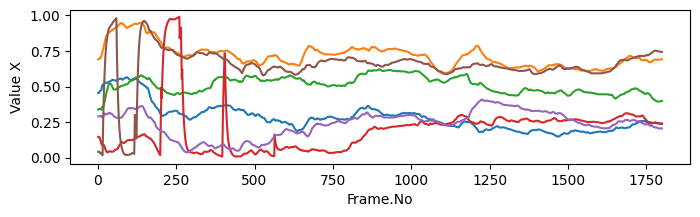

In [236]:

draw_matrix(syn_traj_df, [10,15])
#draw_matrix(syn_traj_df.iloc[280:310],[10,10])


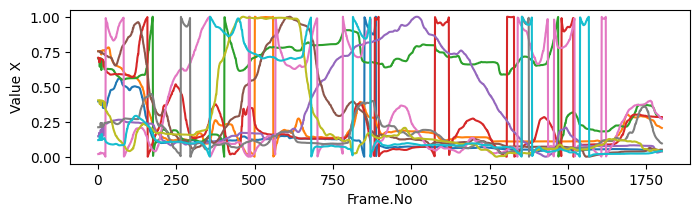

In [211]:
draw_matrix(mat1_onemin_x,[1,10])


In [275]:
from sklearn.metrics.pairwise import pairwise_kernels

def maximum_mean_discrepancy(X, Y, kernel='rbf'):
    """
    Calculate Maximum Mean Discrepancy (MMD) between two datasets X and Y.
    
    Parameters:
        X (ndarray): Data points from the first dataset. Shape (n_samples_X, n_features).
        Y (ndarray): Data points from the second dataset. Shape (n_samples_Y, n_features).
        kernel (str or callable): Kernel function. Default is 'rbf' (Gaussian kernel).
    
    Returns:
        float: MMD value.
    """
    # Calculate kernel matrices
    K_XX = pairwise_kernels(X, metric=kernel)
    K_YY = pairwise_kernels(Y, metric=kernel)
    K_XY = pairwise_kernels(X, Y, metric=kernel)
    
    # Compute MMD^2
    mmd_squared = np.mean(K_XX) + np.mean(K_YY) - 2 * np.mean(K_XY)
    
    return np.sqrt(mmd_squared)

mat2 = video_frames_value_matrix(5,[1,1800],data_type='X')
mat2['U14.X'][1] = 0
mat2['U33.X'][1] = 0

# Assuming df1 and df2 are your DataFrames
print(maximum_mean_discrepancy(mat1_onemin_x.iloc[:, :24].values,mat1_onemin_x.iloc[:, 24:48].values))
print(maximum_mean_discrepancy(mat1_onemin_x.iloc[:, :24].values,syn_traj_df.iloc[:, :24].values))
print(maximum_mean_discrepancy(mat1_onemin_x.iloc[:, 24:48].values,syn_traj_df.iloc[:, :24].values))



0.183431720933661
0.3501527186107039
0.3501471370228057


In [253]:
syn_traj_df['Mean'] = syn_traj_df.mean(axis=1)
syn_traj_df['Std_Dev'] = syn_traj_df.std(axis=1)

gen_df['Mean'] = gen_df.mean(axis=1) 
gen_df['Std_Dev'] = gen_df.mean(axis=1) 





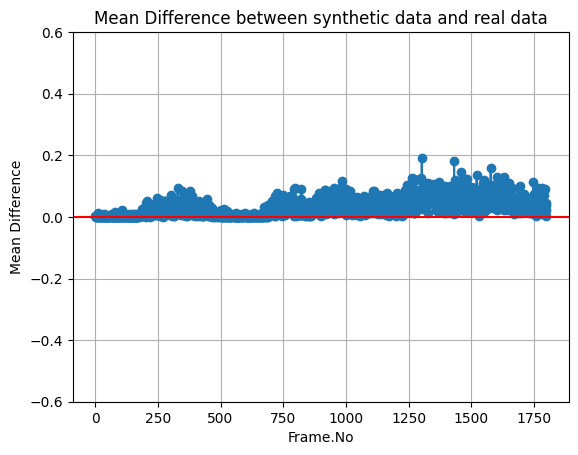

Mean Squared Error (MSE): 0.030919729840470932


In [254]:
# Calculate the difference of 'Mean' columns
#mean_diff = mat1_onemin_x['Mean'] - syn_traj_df['Mean']

mean_diff = np.power(mat1_onemin_x['Mean'] - gen_df['Mean'],2)
# Plot the filtered data
plt.plot(mean_diff.index, mean_diff, marker='o', linestyle='-')
plt.xlabel('Frame.No')
plt.ylabel('Mean Difference')
plt.title('Mean Difference between synthetic data and real data')
plt.axhline(y=0, color='red')
# Set the y-axis limits
plt.ylim(-0.6, 0.6)

plt.grid(True)
plt.show()

mse = mean_diff.mean()

print("Mean Squared Error (MSE):", mse)

In [104]:
from sklearn.metrics import pairwise_distances
def calculate_mmd(mat1_df, syn_df, frame_no_interval):
    # Step 1: Extract the data for the specified Frame.No interval
    mat1_interval = mat1_df.loc[frame_no_interval]
    syn_interval = syn_df.loc[frame_no_interval]
   
    # Selecting only U1.X to U35.X columns from both datasets
    mat1_data = mat1_interval.iloc[:, :35].values
    syn_data = syn_interval.iloc[:, :35].values
    # Step 2: Compute MMD metric
    mmd = pairwise_distances(mat1_data, syn_data, metric='euclidean').mean()

    return mmd

In [270]:
frame_no_interval = range(1, 1500)  # Example interval, adjust as needed
mmd_value = calculate_mmd(mat1_onemin_x, syn_traj_df, frame_no_interval)
print("MMD between the two datasets:", mmd_value)

MMD between the two datasets: 2.5905327855948883


In [261]:
from scipy.stats import ks_2samp

def is_different_dist(X1, X2):
    # Perform Kolmogorov-Smirnov test
    statistic, p_value = ks_2samp(X1, X2)
    
    return p_value

In [262]:
X1 = mat1_onemin_x.iloc[1333]
X2 = gen_df.iloc[1333]

In [263]:
X2 = X2.drop(['Mean','Std_Dev'])
X1 = X1.drop(['Mean','Std_Dev'])

In [264]:
p_values = []
for i in range(1,100):
    X1 = mat1_onemin_x.iloc[i]
    X2 = gen_df.iloc[i]
   # X2 = X2.drop(['Mean','Std_Dev'])
    #X1 = X1.drop(['Mean','Std_Dev'])
    p_values.append(is_different_dist(X1,X2))
p_values

[0.21819498434583617,
 0.24977634254481607,
 0.30074175367539974,
 0.7773540146886425,
 0.6622117186888572,
 0.3793181732619692,
 0.6747777739067066,
 0.24977634254481607,
 0.31887609731648753,
 0.15554316918097177,
 0.7115796407407451,
 0.21238154022221437,
 0.6174238659554397,
 0.04772616925166101,
 0.17874495027416487,
 0.27452358172675084,
 0.9435665895977254,
 0.026544014529152556,
 0.7384996800777341,
 0.7886397341494807,
 0.12047536798584126,
 0.4564501651899737,
 0.2263503027946655,
 0.27452358172675084,
 0.8681841958835141,
 0.3793181732619692,
 0.011501733883990721,
 0.30074175367539974,
 0.6070728612201278,
 0.505756465545725,
 0.543683189188312,
 0.3281708440723996,
 0.07226900031769613,
 0.21238154022221437,
 0.845701730620633,
 0.07570542990495556,
 0.8079895062534541,
 0.27452358172675084,
 0.33759149408001055,
 0.09217190537220672,
 0.1850673834177704,
 0.27452358172675084,
 0.3546997948092632,
 0.893502272653779,
 0.27452358172675084,
 0.16125227150384003,
 0.486935006

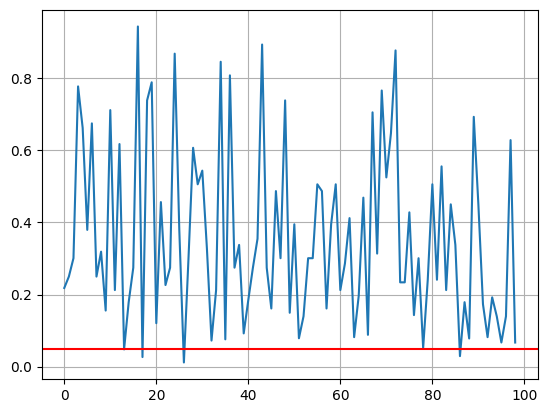

In [265]:
plt.plot(p_values)


plt.axhline(y=0.05, color='red')
# Set the y-axis limits


plt.grid(True)
plt.show()


In [266]:
# Count the number of values under 0.05
count_under_005 = sum(1 for value in p_values if value < 0.05)

print("Number of values under 0.05:", count_under_005/1800)

Number of values under 0.05: 0.0022222222222222222


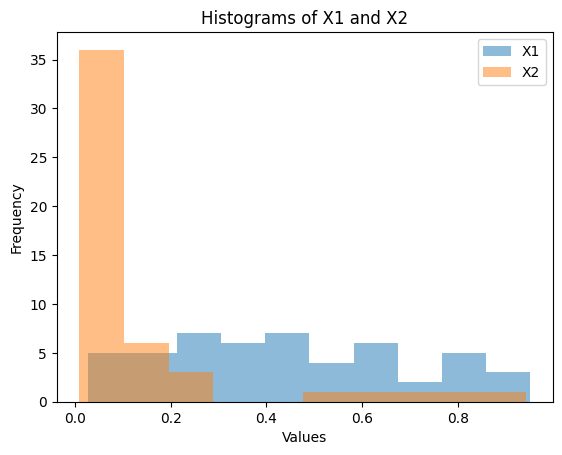

In [269]:
f = 1377
X1 = syn_traj_df.loc[f]
X2 = mat1_onemin_x.loc[f]
# Plot histograms
plt.hist(X1, bins=10, alpha=0.5, label='X1')
plt.hist(X2, bins=10, alpha=0.5, label='X2')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of X1 and X2')
plt.legend()

# Show plot
plt.show()

In [361]:
len(gen_df)

1724

In [346]:
len(X2)

35

In [347]:
len(X1)

35

In [376]:
gen_df.drop(columns=["Original_Mean","Original_Std_Dev"],axis=1)

,U1.X,U2.X,U3.X,U4.X,U5.X,U6.X,U7.X,U8.X,U9.X,U10.X,...,U39.X,U40.X,U41.X,U42.X,U43.X,U44.X,U45.X,U46.X,U47.X,U48.X
1,0.024781,0.441739,0.129156,0.551545,0.674445,0.574495,0.620281,0.654983,0.388346,0.105333,...,0.204397,0.128295,0.923487,0.460540,0.671406,0.512354,0.740830,0.240782,0.166444,0.795153
2,0.893860,0.395297,0.540712,0.609109,0.599846,0.737204,0.575570,0.299813,0.490381,0.568706,...,0.263719,0.741156,0.340656,0.614244,0.248617,0.797743,0.869331,0.247098,0.918527,0.705610
3,0.115310,0.696187,0.491419,0.983202,0.718239,0.596889,0.489002,0.621431,0.590362,0.026221,...,0.501000,0.394973,0.880207,0.333581,0.892726,0.970886,0.174160,0.406607,0.593738,0.728989
4,0.118701,0.523103,0.324673,0.910887,0.933985,0.463788,0.857592,0.642059,0.441989,0.619382,...,0.381539,0.670466,0.224524,0.113815,0.524566,0.199813,0.779981,0.582037,0.524383,0.309791
5,0.619111,0.355409,0.656877,0.338206,0.544887,0.848284,0.546816,0.346136,0.582952,0.293744,...,0.532946,0.922330,0.948462,0.913319,0.346871,0.441983,0.413232,0.634274,0.345407,0.614843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,0.931304,0.179182,0.933462,0.146049,0.024891,0.088380,0.344851,0.984304,0.440608,0.258581,...,0.064292,0.936090,0.233312,0.226482,0.369382,0.997843,0.061997,0.444275,0.266530,0.285005
1797,0.178727,0.062092,0.955693,0.172421,0.064867,0.384470,0.114659,0.985362,0.169001,0.053118,...,0.970806,0.168204,0.997717,0.479558,0.044050,0.225022,0.140040,0.824853,0.239216,0.064599
1798,0.831560,0.386950,0.240881,0.155242,0.272488,0.863418,0.987540,0.249273,0.457702,0.352947,...,0.903894,0.987823,0.316999,0.157003,0.329940,0.225352,0.301602,0.089708,0.327925,0.685132
1799,0.026601,0.000876,0.324630,0.849836,0.968721,0.957355,0.205543,0.073796,0.055945,0.464933,...,0.217071,0.280403,0.968841,0.005804,0.061065,0.305825,0.368134,0.068436,0.125194,0.035475


In [364]:
gen_df.loc[1]


U1.X                0.498491
U2.X                0.745914
U3.X                0.546717
U4.X                0.481127
U5.X                0.999080
U6.X                0.547933
U7.X                0.562349
U8.X                0.742941
U9.X                0.464837
U10.X               0.670923
U11.X               0.384109
U12.X               0.926089
U13.X               0.434386
U14.X               0.370022
U15.X               0.412490
Original_Mean       0.536453
Original_Std_Dev    0.298285
Name: 1, dtype: float64